# Northwind Sales Analysis

This project analyzes the sales data from the Northwind database using SQL and Python. The project aims to analyze top customers, popular products, salesperson performance, and monthly sales trends.

![](c_1.png "Trends")

Northwind database source: https://github.com/jpwhite3/northwind-SQLite3/tree/main

---

## Setup


In [1]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

In [2]:
# Path
db_path = 'northwind.db'

# Connect to the SQLite database
conn = sqlite3.connect(db_path)

# Execute a query and return the result as a pandas DataFrame
def run_query(query):
    return pd.read_sql_query(query, conn)

# Load the Customers table into a pandas DataFrame
df_customers = run_query("SELECT * FROM Customers")

# Display the DataFrame to verify the connection and data
print(df_customers.head())

  CustomerID                         CompanyName         ContactName  \
0      ALFKI                 Alfreds Futterkiste        Maria Anders   
1      ANATR  Ana Trujillo Emparedados y helados        Ana Trujillo   
2      ANTON             Antonio Moreno Taquería      Antonio Moreno   
3      AROUT                     Around the Horn        Thomas Hardy   
4      BERGS                  Berglunds snabbköp  Christina Berglund   

           ContactTitle                        Address         City  \
0  Sales Representative                  Obere Str. 57       Berlin   
1                 Owner  Avda. de la Constitución 2222  México D.F.   
2                 Owner                Mataderos  2312  México D.F.   
3  Sales Representative                120 Hanover Sq.       London   
4   Order Administrator                Berguvsvägen  8        Luleå   

            Region PostalCode  Country           Phone             Fax  
0   Western Europe      12209  Germany     030-0074321     030-0076

## Top Customers Analysis

Identify the top 10 customers by total sales to understand which customers contribute the most to revenue.


In [3]:
# Query
top_customers_query = """
SELECT 
    customers.CustomerID, 
    customers.CompanyName, 
    SUM("Order Details".UnitPrice * "Order Details".Quantity) AS TotalSales
FROM 
    Orders
JOIN 
    Customers ON Orders.CustomerID = Customers.CustomerID
JOIN 
    "Order Details" ON Orders.OrderID = "Order Details".OrderID
GROUP BY 
    customers.CustomerID, customers.CompanyName
ORDER BY 
    TotalSales DESC
LIMIT 10;
"""

# Execute the query
top_customers = run_query(top_customers_query)
print(top_customers)

  CustomerID                         CompanyName  TotalSales
0      BSBEV                       B's Beverages  6154115.34
1      HUNGC          Hungry Coyote Import Store  5698023.67
2      RANCH                       Rancho grande  5559110.08
3      GOURL                 Gourmet Lanchonetes  5552597.90
4      ANATR  Ana Trujillo Emparedados y helados  5534356.65
5      RICAR                  Ricardo Adocicados  5524990.91
6      FOLIG                   Folies gourmandes  5505502.85
7      LETSS                   Let's Stop N Shop  5462611.57
8      LILAS                   LILA-Supermercado  5439186.80
9      PRINI              Princesa Isabel Vinhos  5437042.71


The query calculates the total sales for each customer by summing the product of UnitPrice and Quantity from the Order Details table, grouped by customer. The results are ordered by total sales in descending order to identify the top 10 customers.


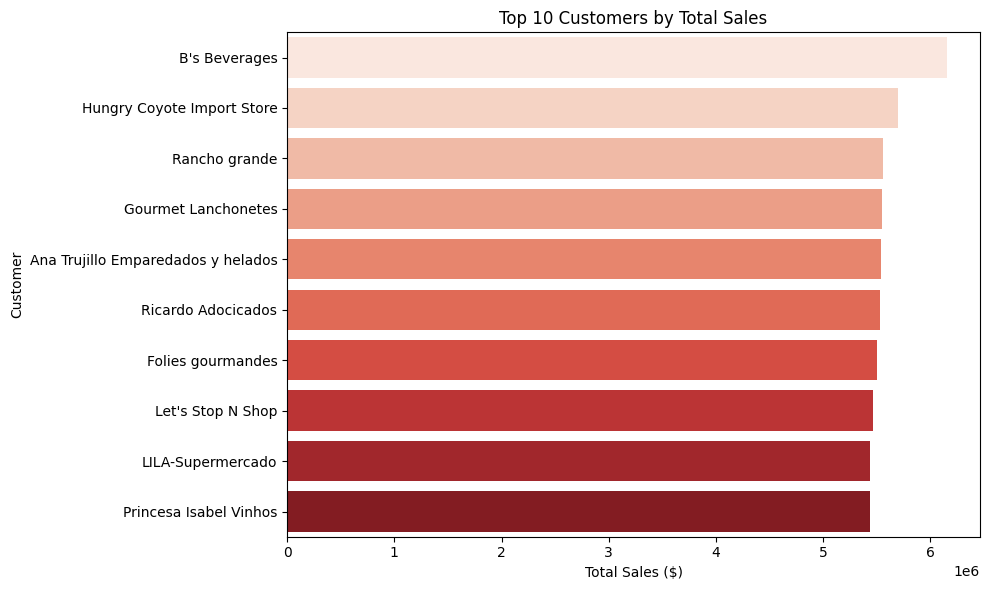

In [4]:
# Visualization

# Convert TotalSales to a float
top_customers['TotalSales'] = top_customers['TotalSales'].astype(float)

# Plotting Top Customers by Total Sales
plt.figure(figsize=(10, 6))
sns.barplot(x='TotalSales', y='CompanyName', data=top_customers, 
            hue='CompanyName', palette='Reds', legend=False)
plt.title('Top 10 Customers by Total Sales')
plt.xlabel('Total Sales ($)')
plt.ylabel('Customer')
plt.tight_layout()
plt.show()

## Product Popularity

Determine the most popular products based on the number of times they have been ordered.


In [5]:
# Query
product_popularity_query = """
SELECT 
    products.ProductID, 
    products.ProductName, 
    COUNT("Order Details".OrderID) AS OrderCount
FROM 
    Products
JOIN 
    "Order Details" ON Products.ProductID = "Order Details".ProductID
GROUP BY 
    products.ProductID, products.ProductName
ORDER BY 
    OrderCount DESC
LIMIT 10;
"""

# Execute the query
product_popularity = run_query(product_popularity_query)

# Display the results
product_popularity

,ProductID,ProductName,OrderCount
0,66,Louisiana Hot Spiced Okra,8040
1,19,Teatime Chocolate Biscuits,8024
2,70,Outback Lager,8020
3,20,Sir Rodney's Marmalade,7999
4,26,Gumbär Gummibärchen,7999
5,69,Gudbrandsdalsost,7991
6,59,Raclette Courdavault,7982
7,57,Ravioli Angelo,7969
8,13,Konbu,7968
9,31,Gorgonzola Telino,7964


This query counts the number of times each product appears in the Order Details table, indicating how often each product is ordered. The top 10 most popular products are identified by sorting the results in descending order of order count.


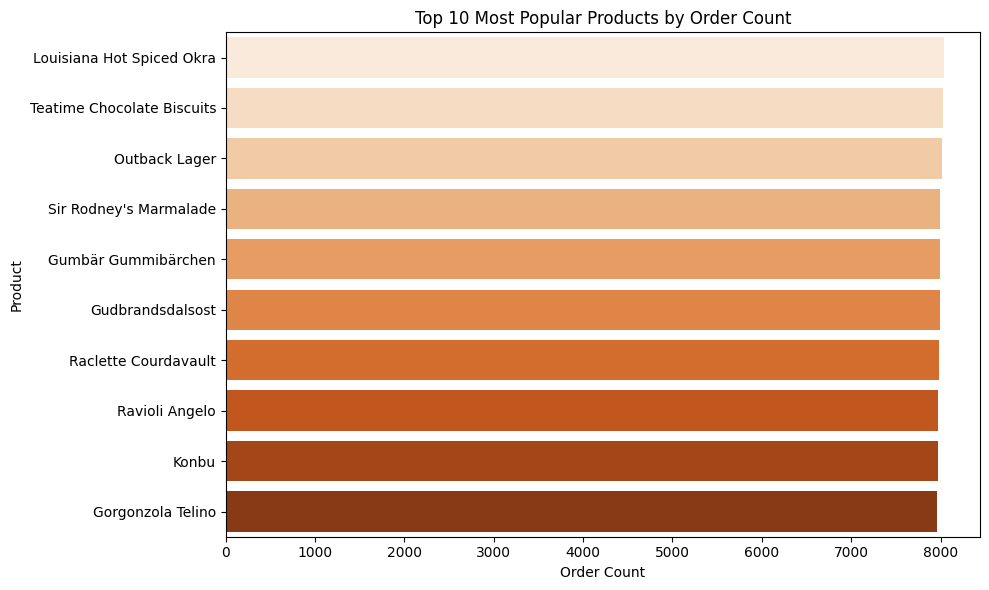

In [6]:
# Vizualization

# Convert OrderCount to an integer
product_popularity['OrderCount'] = product_popularity['OrderCount'].astype(int)

# Plotting Most Popular Products by Order Count
plt.figure(figsize=(10, 6))
sns.barplot(x='OrderCount', y='ProductName', data=product_popularity, 
            hue='ProductName', palette='Oranges', legend=False)
plt.title('Top 10 Most Popular Products by Order Count')
plt.xlabel('Order Count')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

## Salesperson Performance

Analyze which salespeople generate the most revenue by summing the total sales attributed to each employee.


In [7]:
# Query
salesperson_performance_query = """
SELECT 
    employees.EmployeeID, 
    employees.LastName || ', ' || employees.FirstName AS EmployeeName, 
    SUM("Order Details".UnitPrice * "Order Details".Quantity) AS TotalSales
FROM 
    Orders
JOIN 
    Employees ON Orders.EmployeeID = Employees.EmployeeID
JOIN 
    "Order Details" ON Orders.OrderID = "Order Details".OrderID
GROUP BY 
    employees.EmployeeID, EmployeeName
ORDER BY 
    TotalSales DESC
LIMIT 10;
"""

# Execute the query
salesperson_performance = run_query(salesperson_performance_query)

# Display the results
salesperson_performance

,EmployeeID,EmployeeName,TotalSales
0,4,"Peacock, Margaret",51505691.80
1,5,"Buchanan, Steven",51393234.57
2,3,"Leverling, Janet",50455812.22
3,1,"Davolio, Nancy",49669459.34
4,7,"King, Robert",49668627.06
5,8,"Callahan, Laura",49287575.56
6,6,"Suyama, Michael",49144251.53
7,9,"Dodsworth, Anne",49025334.37
8,2,"Fuller, Andrew",48325312.27


This query calculates total sales for each employee by summing the product of UnitPrice and Quantity from the Order Details table, grouped by employee. The top-performing salespeople are identified by sorting the results in descending order of total sales.


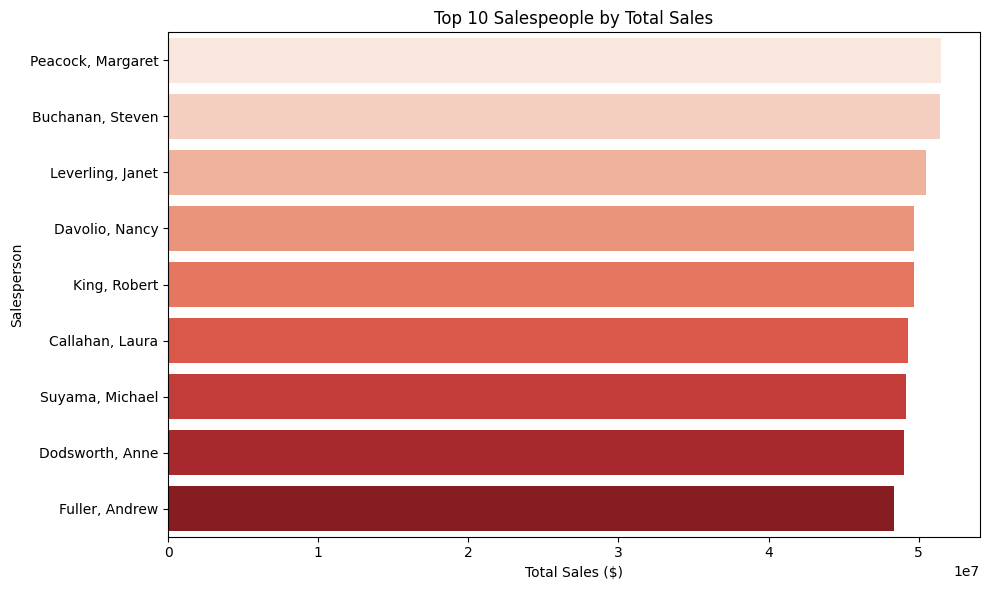

In [8]:
# Visualization

# Plotting Top Salespeople by Total Sales
plt.figure(figsize=(10, 6))
sns.barplot(x='TotalSales', y='EmployeeName', data=salesperson_performance, 
            hue='EmployeeName', palette='Reds', legend=False)
plt.title('Top 10 Salespeople by Total Sales')
plt.xlabel('Total Sales ($)')
plt.ylabel('Salesperson')
plt.tight_layout()
plt.show()

## Monthly Sales Trends

Analyze monthly sales trends to identify peak sales periods.


In [9]:
# Query
monthly_sales_trends_query = """
SELECT 
    strftime('%Y-%m', Orders.OrderDate) AS OrderMonth, 
    SUM("Order Details".UnitPrice * "Order Details".Quantity) AS TotalSales
FROM 
    Orders
JOIN 
    "Order Details" ON Orders.OrderID = "Order Details".OrderID
GROUP BY 
    OrderMonth
ORDER BY 
    OrderMonth;
"""

# Execute the query
monthly_sales_trends = run_query(monthly_sales_trends_query)

# Display the results
monthly_sales_trends

,OrderMonth,TotalSales
0,2012-07,2066219.40
1,2012-08,3556875.79
2,2012-09,3440144.98
3,2012-10,3201529.96
4,2012-11,2980494.74
...,...,...
131,2023-06,3071787.73
132,2023-07,3350337.36
133,2023-08,3293158.67
134,2023-09,3544698.51


This query calculates total sales for each month by summing the product of UnitPrice and Quantity from the Order Details table, grouped by the month of the order. The results are ordered chronologically to observe trends over time.


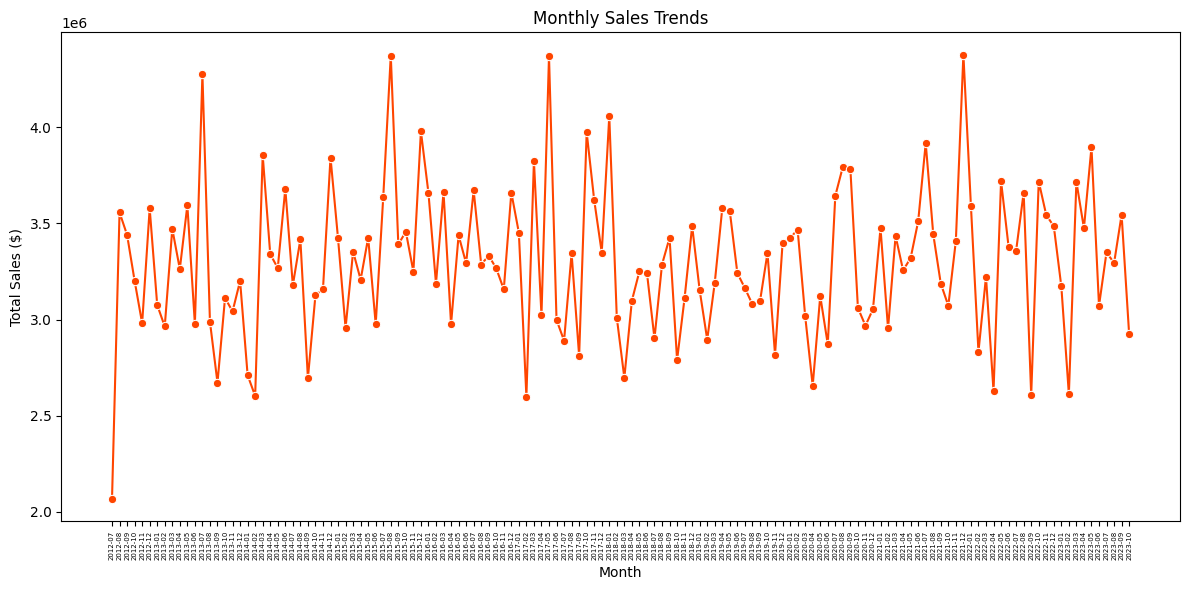

In [10]:
# Visualization

# Plotting Monthly Sales Trends
plt.figure(figsize=(12, 6))
sns.lineplot(x='OrderMonth', y='TotalSales', data=monthly_sales_trends, 
             marker='o', color='orangered')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=90, fontsize=5)
plt.tight_layout()
plt.show()

## Yearly Trends Aligned by Month

Further explore the monthly sales trends by aligning each year on top of each other. This approach allows us to identify any recurring patterns or seasonality in the sales data. We will also calculate the average monthly sales across all years to provide a baseline for comparison.


In [11]:
# Extract the month and year from the OrderMonth column and then group the data by month across different years.

monthly_sales_trends['OrderMonth'] = pd.to_datetime(monthly_sales_trends['OrderMonth'])

# Extract the month and year
monthly_sales_trends['Month'] = monthly_sales_trends['OrderMonth'].dt.month
monthly_sales_trends['Year'] = monthly_sales_trends['OrderMonth'].dt.year

# Group by Month and Year to get the total sales for each month across different years
grouped = monthly_sales_trends.groupby(['Year', 'Month']).agg({'TotalSales': 'sum'}).reset_index()

# Create a pivot table to align all years by month
pivot_table = grouped.pivot(index='Month', columns='Year', values='TotalSales')

# Calculate the average sales per month across years
monthly_avg = pivot_table.mean(axis=1)

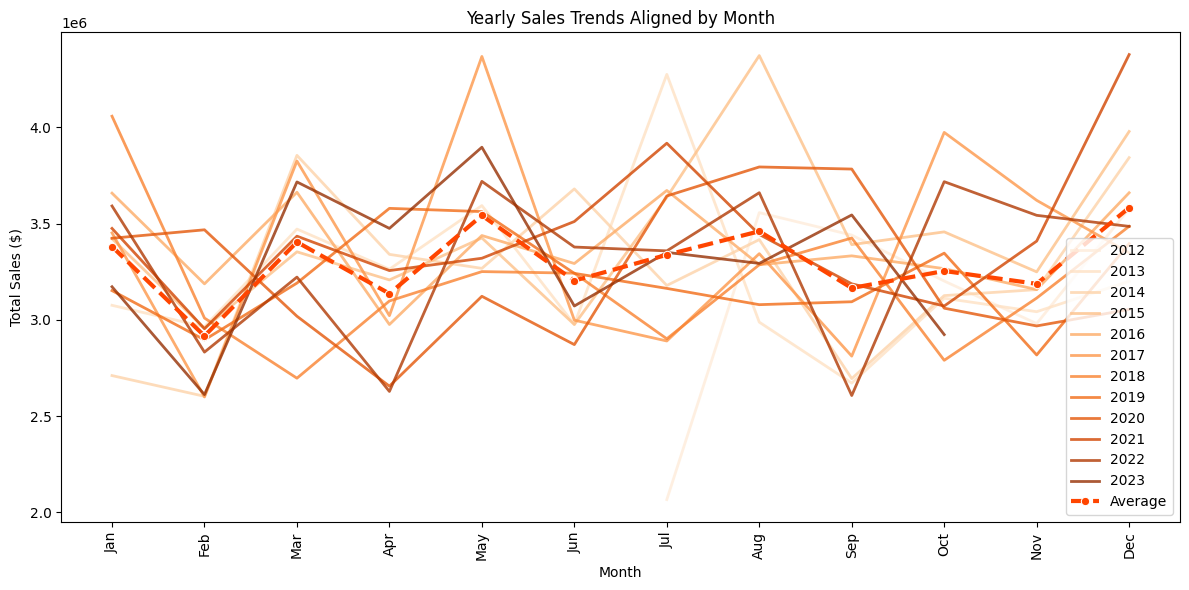

In [12]:
colors = sns.color_palette("Oranges", n_colors=len(pivot_table.columns))
plt.figure(figsize=(12, 6))

# Plot each year's sales trend
for i, year in enumerate(pivot_table.columns):
    sns.lineplot(x=pivot_table.index, y=pivot_table[year], 
                 color=colors[i], linewidth=2, alpha=0.8, label=str(year))

# Plot the average sales trend on top
sns.lineplot(x=monthly_avg.index, y=monthly_avg, 
             color='orangered', linewidth=3, linestyle='--', marker='o', label='Average')

plt.title('Yearly Sales Trends Aligned by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')

plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], 
           rotation=90, fontsize=10)

plt.tight_layout()
plt.show()

## Conclusion

The analyses conducted provide valuable insights into the Northwind database's sales data:

* Top Customers: Identifying top customers allows the company to focus on high-value clients.
    
* Product Popularity: Understanding which products are most popular can inform inventory and marketing decisions.
    
* Salesperson Performance: Analyzing salesperson performance helps in identifying star performers and those who might need additional support / training.
    
* Monthly Sales Trends: Recognizing sales patterns over time can aid in demand forecasting and strategic planning.

In addition, by aligning each year's sales trends on top of each other by month, we can observe consistency across the year.

---


In [13]:
# Close the database connection
conn.close()

## Presentation Cover

Create a cover for the presentation of the analysis.


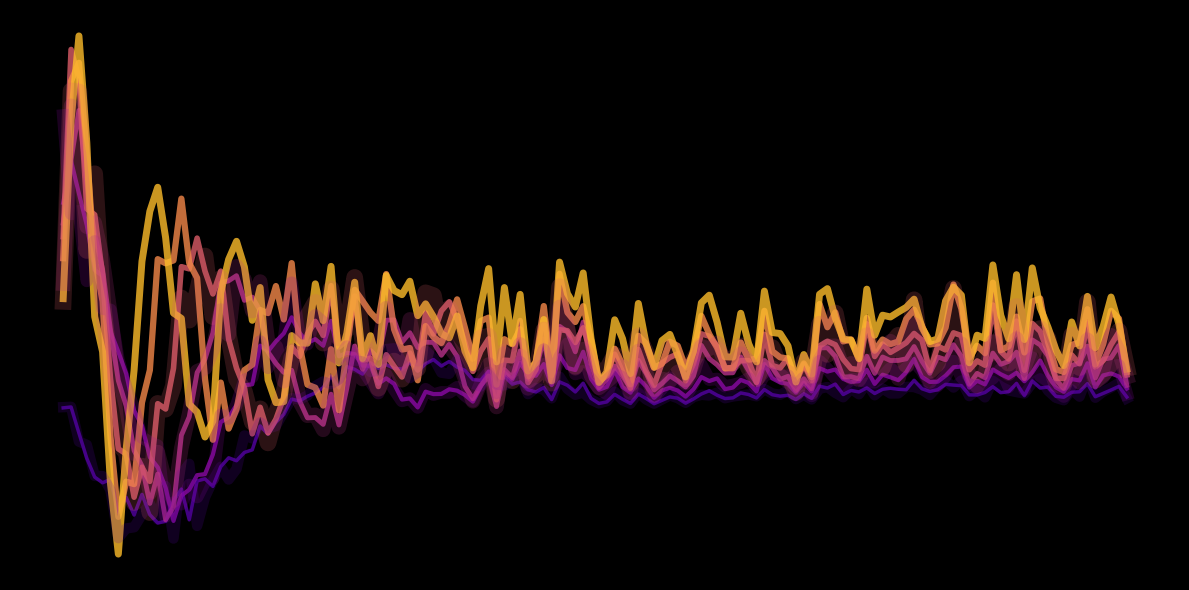

In [14]:
x = np.arange(len(monthly_sales_trends))
y = monthly_sales_trends['TotalSales'].values

# Normalize
y = (y - y.min()) / (y.max() - y.min())

plt.figure(figsize=(12, 6), facecolor='black')

# Add noise
noise = np.random.normal(0, 0.1, len(y))
y_noisy = y + noise

# Plot, phase shift, and varying frequency
for i in range(1, 7):

    height_variation = np.random.uniform(0.8, 1.2, len(y))
    y_neon = (np.sin(x * i / 10 + np.pi / i) * np.exp(-x / 20) + y_noisy * (0.1 * i)) * height_variation
    plt.plot(x, y_neon, color=plt.cm.plasma(i / 7), linewidth=2 + i * 0.5, alpha=0.8)

plt.axis('off')

# Enhance
for i in range(1, 5):

    height_variation_glow = np.random.uniform(0.6, 1.4, len(y))
    y_glow = (np.sin(x * i / 10 + np.pi / i) * np.exp(-x / 20) + y_noisy * (0.1 * i)) * height_variation_glow
    plt.plot(x, y_glow, color=plt.cm.plasma(i / 7), alpha=0.2, linewidth=6 + i * 1.5)

plt.tight_layout()
plt.show()